<a href="https://colab.research.google.com/github/PhanDuyNhat/AI/blob/Code_AI/Week9%20(part2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Hinh nay la:  [5]


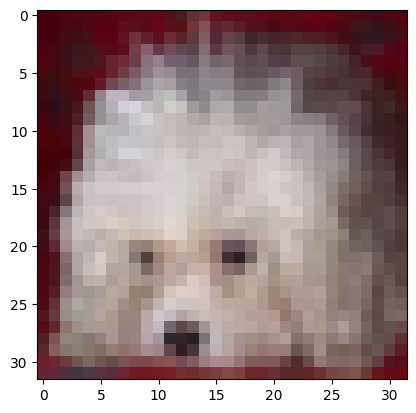

In [13]:
import matplotlib.pyplot as plt
import numpy as np
hinh = x_train[5555]
plt.imshow(hinh, cmap= plt.cm.binary)
plt.show
print('Hinh nay la: ', y_train[5555])

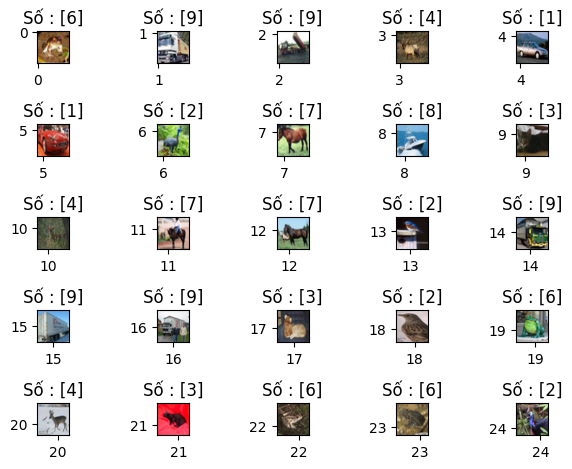

In [14]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation = 'none')
  plt.title('Số : {}'.format(y_train[i]))
  plt.xticks([i])
  plt.yticks([i])

In [15]:

from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(3000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_5 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 dense_7 (Dense)             (None, 10)                5010      
                                                                 
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


In [16]:

X=x_test
Y=y_test

In [17]:
x_train = x_train .reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [18]:
from keras.utils import to_categorical #one hot enccoding
y_train = to_categorical (y_train,10)
y_test = to_categorical(y_test,10)


In [19]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs =5,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Độ chính xác trên tập kiểm tra:',test_acc)
print('Hàm mất mát trên tập kiểm tra:',test_loss)

Epoch 1/5
391/391 [==============================] - 118s 301ms/step - loss: 2.2302 - accuracy: 0.2563
Epoch 2/5
391/391 [==============================] - 117s 299ms/step - loss: 1.8038 - accuracy: 0.3512
Epoch 3/5
391/391 [==============================] - 132s 336ms/step - loss: 1.7005 - accuracy: 0.3892
Epoch 4/5
391/391 [==============================] - 119s 304ms/step - loss: 1.6298 - accuracy: 0.4169
Epoch 5/5
313/313 [==============================] - 10s 32ms/step - loss: 1.5936 - accuracy: 0.4395
Độ chính xác trên tập kiểm tra: 0.43950000405311584
Hàm mất mát trên tập kiểm tra: 1.5935850143432617


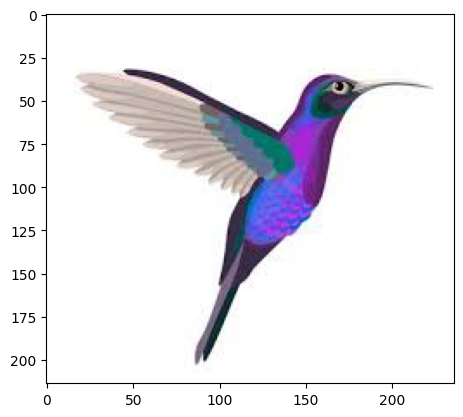

In [30]:
url='birrd.jpg'
img = plt.imread(url)
plt.imshow(img)
plt.show()

In [ ]:
model.save('mode3d.h5')

1/1 [==============================] - 0s 100ms/step


array([0])

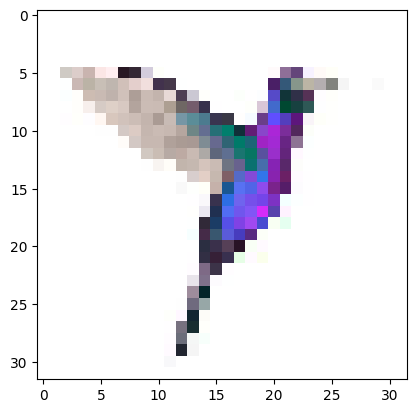

In [35]:
from keras.utils.image_utils import img_to_array,load_img
img = load_img(url,target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)